loading River_Discharge
loading pH
loading Dissolved_Oxygen
loading Electrical_Conductivity
loading Temperature


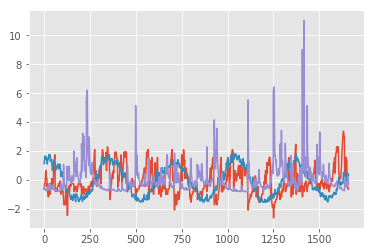

[ 119229.09965481  119229.09965481  120615.05770805  122001.02237007
  122001.02237007  122001.02237007  124772.93847656  126158.90313858
  127544.85458305  128930.81924507]
1661


In [88]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from OX_database import DissolvedOxygenDatabase

path = "database/"
sequence_size = 3
train_prop = 0.75
first_day = [2007, 7, 1]
database = DissolvedOxygenDatabase(database_path=path,
                                   sequence_size=3,
                                   train_prop=train_prop,
                                   sequence_batch_size=50,
start_date=first_day)

train_input, train_target, train_days = database.next_batch(batch_size="all")
test_input, test_target, test_days = database.next_batch(set="test")


DO_mean, DO_std = database.data_transformation["Dissolved_Oxygen"]
train_target = train_target*DO_std + DO_mean
test_target = test_target*DO_std + DO_mean
pH_mean, pH_std = database.data_transformation["pH"]
train_input[:,0] = train_input[:,0]*pH_std + pH_mean
test_input[:,0] = test_input[:,0]*pH_std + pH_mean
Temperature_mean, Temperature_std = database.data_transformation["Temperature"]
train_input[:,1] = train_input[:,1]*Temperature_std + Temperature_mean
test_input[:,1] = test_input[:,1]*Temperature_std + Temperature_mean
RD_mean, RD_std = database.data_transformation["River_Discharge"]
train_input[:,2] = train_input[:,0]*RD_std + RD_mean
test_input[:,2] = test_input[:,0]*RD_std + RD_mean
print(train_input[0:10,2])

train_target = train_target*DO_std + DO_mean
pH_mean, pH_std = database.data_transformation["pH"]
train_input[:,0] = train_input[:,0]*pH_std + pH_mean
Temperature_mean, Temperature_std = database.data_transformation["Temperature"]
train_input[:,1] = train_input[:,1]*Temperature_std + Temperature_mean
RD_mean, RD_std = database.data_transformation["River_Discharge"]
train_input[:,2] = train_input[:,0]*RD_std + RD_mean
print(train_input[:,2].size)



In [86]:
import GPflow
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

print(len(train_input))

k = GPflow.kernels.Matern52(1, lengthscales=0.3)
m = GPflow.gpr.GPR(train_input, train_target, kern=k)
m.likelihood.variance = 0.01



1661


IndexError: tuple index out of range